In [1]:
import petroeval as pet
import petroeval.pseudomodes as pds
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('hidden_test.csv.txt', sep=';')

Dataframe also contain lithofacies labels. In this tutorial, the lithofacies are predicted for a certain range
(say a missing range). The labels for this region is dropped and machine data is generated and evaluated with 
the dropped labels. The complete data set from 10 wells are used for this section of the tutorial. A section of the 
data is to be predicted, hence the dataframe index is used to select this portion as opposed depth column (DEPTH_MD) 
which varies from well to well. An example using the DEPTH_MD is more suited for a single well which is shown at the bottom section of this tutorial

In [3]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-23,1518.280,433906.75,6460000.5,-1493.241821,HORDALAND GP.,Skade Fm.,15.506232,NaN,NaN,...,146.526276,326.451263,-1.993768,0.109706,NaN,NaN,88.968864,NaN,65000,3.0
1,15/9-23,1518.432,433906.75,6460000.5,-1493.393799,HORDALAND GP.,Skade Fm.,18.524611,NaN,NaN,...,147.605148,322.926361,1.024611,-0.006418,NaN,NaN,92.287186,NaN,65000,3.0
2,15/9-23,1518.584,433906.75,6460000.5,-1493.545776,HORDALAND GP.,Skade Fm.,18.855669,NaN,NaN,...,140.783127,325.283142,1.355668,0.022769,NaN,NaN,95.605499,NaN,65000,3.0
3,15/9-23,1518.736,433906.75,6460000.5,-1493.697754,HORDALAND GP.,Skade Fm.,19.163353,NaN,NaN,...,125.159531,334.233185,1.663353,0.024972,NaN,NaN,98.923820,NaN,65000,3.0
4,15/9-23,1518.888,433906.75,6460000.5,-1493.849609,HORDALAND GP.,Skade Fm.,18.489744,NaN,0.849849,...,107.576691,330.952362,0.989743,0.024527,NaN,NaN,102.242142,NaN,65000,3.0


In [4]:
# using the DataHandlers class to process the dataframe and set the curve headers
# the default FORCE headers are used so no manual setting is done. The set_mnemonics
#arguments should be set to correspond to the headers present in the log data. The lithofacies 
#target column is passed as arg to the DataHandlers class to indicate that the column should not 
#be dropped, as this will be used for training the model

new_df = pds.DataHandlers(df=df, target='FORCE_2020_LITHOFACIES_LITHOLOGY')
df1 = new_df.set_mnemonics()

In [5]:
# encoding the labels

lithology_numbers = {30000: 0,
                        65030: 1,
                        65000: 2,
                        80000: 3,
                        74000: 4,
                        70000: 5,
                        70032: 6,
                        88000: 7,
                        86000: 8,
                        99000: 9,
                        90000: 10,
                        93000: 11}

df1['FORCE_2020_LITHOFACIES_LITHOLOGY'] = df.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_numbers)

In [6]:
facies = pds.PredictLabels(df=df1, depth_col=False)  #dataframe index is used as depth when depth_col is set as False

In [7]:
# getting the actual labels of the section to be predicted and replacing it by missing values 
# to ensure data leakage is prevented in this test

import numpy as np

labels = df1.FORCE_2020_LITHOFACIES_LITHOLOGY[10000:11062]

df1.FORCE_2020_LITHOFACIES_LITHOLOGY.iloc[10000:11062] = np.nan

labels

10000    1
10001    1
10002    1
10003    1
10004    1
        ..
11057    0
11058    0
11059    1
11060    1
11061    2
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1062, dtype: int64

In [8]:
labels1 = df1.FORCE_2020_LITHOFACIES_LITHOLOGY[10000:11062]
labels1

10000   NaN
10001   NaN
10002   NaN
10003   NaN
10004   NaN
         ..
11057   NaN
11058   NaN
11059   NaN
11060   NaN
11061   NaN
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1062, dtype: float64

[11:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.05721	validation_1-mlogloss:2.05846
[10]	validation_0-mlogloss:0.88127	validation_1-mlogloss:0.88615
[20]	validation_0-mlogloss:0.51981	validation_1-mlogloss:0.52875
[30]	validation_0-mlogloss:0.36579	validation_1-mlogloss:0.37754
[40]	validation_0-mlogloss:0.28982	validation_1-mlogloss:0.30380
[50]	validation_0-mlogloss:0.24686	validation_1-mlogloss:0.26256
[60]	validation_0-mlogloss:0.21866	validation_1-mlogloss:0.23618
[70]	validation_0-mlogloss:0.19875	validation_1-mlogloss:0.21762
[80]	validation_0-mlogloss:0.18381	validation_1-mlogloss:0.20376
[90]	validation_0-mlogloss:0.17216	validation_1-mlogloss:0.19323
[99]	validation_0-mlogloss:0.16344	valid

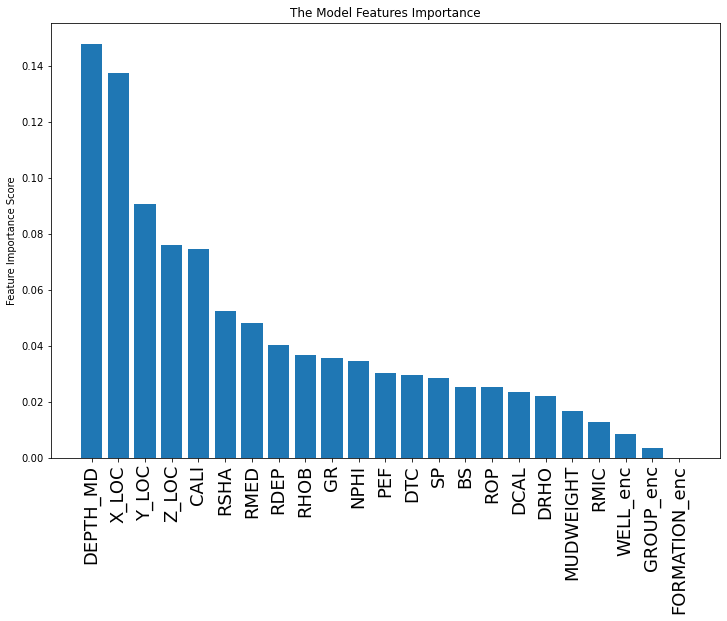

<Figure size 864x576 with 0 Axes>

In [9]:
model, test_features = facies._train(train_df=df1,
                                     start=10000,
                                     end=11062,
                                     target='FORCE_2020_LITHOFACIES_LITHOLOGY',
                                     model='XGB')

In [12]:
predictions1 = facies.predict(model=model, test_df=test_features)

Predictions complete!


In [13]:
import sklearn.metrics as sklm

def show_evaluation(pred, true):
    
    print(f'Accuracy is: {round((sklm.accuracy_score(true, pred) * 100), 2)} %')
    print(f'F1 is: {round((sklm.f1_score(pred, true.values, average="weighted") * 100), 2)} %')

show_evaluation(predictions1, labels)   # Random Forest Model

Accuracy is: 64.6 %
F1 is: 63.16 %


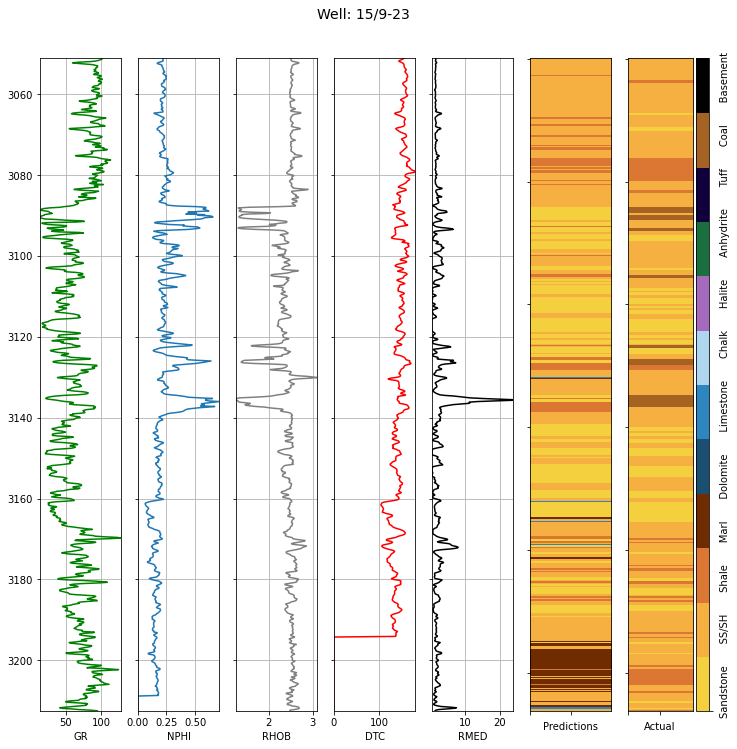

In [14]:
facies.compare_lithofacies(df[10000:11062], labels, predictions1, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')

# Using the Depth column (DEPTH_MD)

As stated above, the Depth ranges for the different wells in the dataset differes, this method of using the depth for prediction works best only when a single well is used. This well, the preferred section to be predicted is easily taken from the dataset as preferred. Accuracy is largely dependent on the similarity between the other parts of the data set and the desired section to be predicted because there is little data for training in this case

In [1]:
import petroeval as pet
import petroeval.pseudomodes as pds
import pandas as pd
%matplotlib inline

df = pd.read_csv('hidden_test.csv.txt', sep=';')

# using the DataHandlers class to process the dataframe and set the curve headers
# the default FORCE headers are used so no manual setting is done. The set_mnemonics
#arguments should be set to correspond to the headers present in the log data. The lithofacies 
#target column is passed as arg to the DataHandlers class to indicate that the column should not 
#be dropped, as this will be used for training the model

new_df = df.loc[df['WELL'] == '15/9-23']

handle_df = pds.DataHandlers(df=new_df, target='FORCE_2020_LITHOFACIES_LITHOLOGY')
df1 = handle_df.set_mnemonics()

In [2]:
df1

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,FORCE_2020_LITHOFACIES_LITHOLOGY
0,15/9-23,1518.280,433906.75000,6460000.5,-1493.241821,HORDALAND GP.,Skade Fm.,15.506232,NaN,NaN,...,NaN,147.043427,NaN,17.5,146.526276,-1.993768,0.109706,NaN,NaN,65000
1,15/9-23,1518.432,433906.75000,6460000.5,-1493.393799,HORDALAND GP.,Skade Fm.,18.524611,NaN,NaN,...,NaN,145.426468,NaN,17.5,147.605148,1.024611,-0.006418,NaN,NaN,65000
2,15/9-23,1518.584,433906.75000,6460000.5,-1493.545776,HORDALAND GP.,Skade Fm.,18.855669,NaN,NaN,...,NaN,145.295105,NaN,17.5,140.783127,1.355668,0.022769,NaN,NaN,65000
3,15/9-23,1518.736,433906.75000,6460000.5,-1493.697754,HORDALAND GP.,Skade Fm.,19.163353,NaN,NaN,...,NaN,143.657593,NaN,17.5,125.159531,1.663353,0.024972,NaN,NaN,65000
4,15/9-23,1518.888,433906.75000,6460000.5,-1493.849609,HORDALAND GP.,Skade Fm.,18.489744,NaN,0.849849,...,NaN,142.838440,NaN,17.5,107.576691,0.989743,0.024527,NaN,NaN,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11058,15/9-23,3212.016,433933.25000,6459977.0,-3186.522949,VESTLAND GP.,Skagerrak Fm.,8.622439,NaN,4.265228,...,6.211904,NaN,NaN,8.5,17.063992,0.122439,0.050846,NaN,NaN,30000
11059,15/9-23,3212.168,433933.25000,6459977.0,-3186.674561,VESTLAND GP.,Skagerrak Fm.,8.654653,NaN,2.188407,...,5.445361,NaN,NaN,8.5,17.698082,0.154652,0.050241,NaN,NaN,65030
11060,15/9-23,3212.320,433933.25000,6459977.0,-3186.826660,VESTLAND GP.,Skagerrak Fm.,8.596466,NaN,1.375046,...,5.160233,NaN,NaN,8.5,22.885672,0.096466,0.042768,NaN,NaN,65030
11061,15/9-23,3212.472,433933.28125,6459977.0,-3186.978271,VESTLAND GP.,Skagerrak Fm.,8.673164,NaN,1.166480,...,5.000957,NaN,NaN,8.5,36.670067,0.173165,0.039578,NaN,NaN,65000


In [3]:
# encoding the labels

lithology_numbers = {30000: 0,
                        65030: 1,
                        65000: 2,
                        80000: 3,
                        74000: 4,
                        70000: 5,
                        70032: 6,
                        88000: 7,
                        86000: 8,
                        99000: 9,
                        90000: 10,
                        93000: 11}

df1['FORCE_2020_LITHOFACIES_LITHOLOGY'] = df1.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_numbers)

In [4]:
facies = pds.PredictLabels(df=df1, depth_col='DEPTH_MD') 

In [5]:
# getting the actual labels of the section to be predicted and replacing it by missing values 
# to ensure data leakage is prevented in this test

# getting the desired range in a new dataframe

labels = new_df[(new_df['DEPTH_MD'] >= 1600) & (new_df['DEPTH_MD'] < 1800)].FORCE_2020_LITHOFACIES_LITHOLOGY

In [6]:
labels = labels.map(lithology_numbers)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


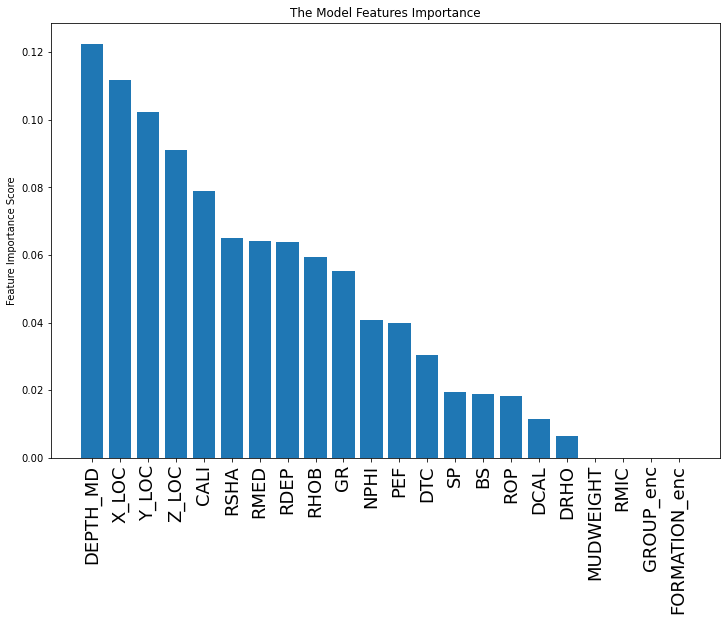

<Figure size 864x576 with 0 Axes>

In [7]:
model1, test_features1 = facies._train(train_df=df1,
                                     start=1600,
                                     end=1800,
                                     target='FORCE_2020_LITHOFACIES_LITHOLOGY',
                                     model='RF')

In [8]:
predictions1 = facies.predict(model=model1, test_df=test_features1)  # random forest test with depth

Predictions complete!


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [9]:
import sklearn.metrics as sklm

def show_evaluation(pred, true):
    
    print(f'Accuracy is: {round((sklm.accuracy_score(true, pred) * 100), 2)} %')
    print(f'F1 is: {round((sklm.f1_score(pred, true.values, average="weighted") * 100), 2)} %')

show_evaluation(predictions1, labels)  

Accuracy is: 99.62 %
F1 is: 99.81 %


In [10]:
predictions1

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [11]:
section = df1[(df1['DEPTH_MD'] >= 1600) & (df1['DEPTH_MD'] < 1800)]

In [12]:
section['prediction'] = predictions1
section['prediction'].value_counts()

2    1316
Name: prediction, dtype: int64

# Predicted well sections comparisons

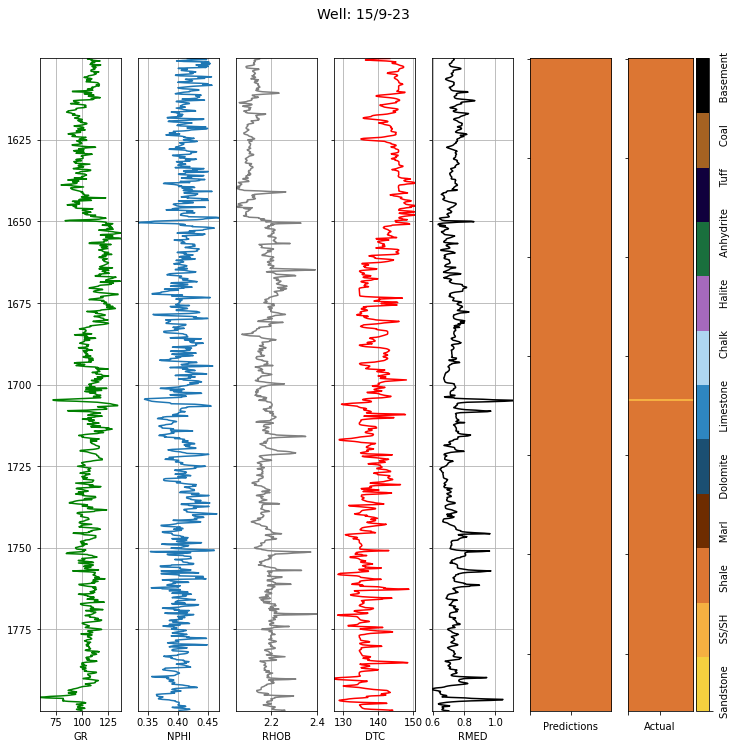

In [13]:
facies.compare_lithofacies(section, labels, predictions1, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD') 

# Complete well section

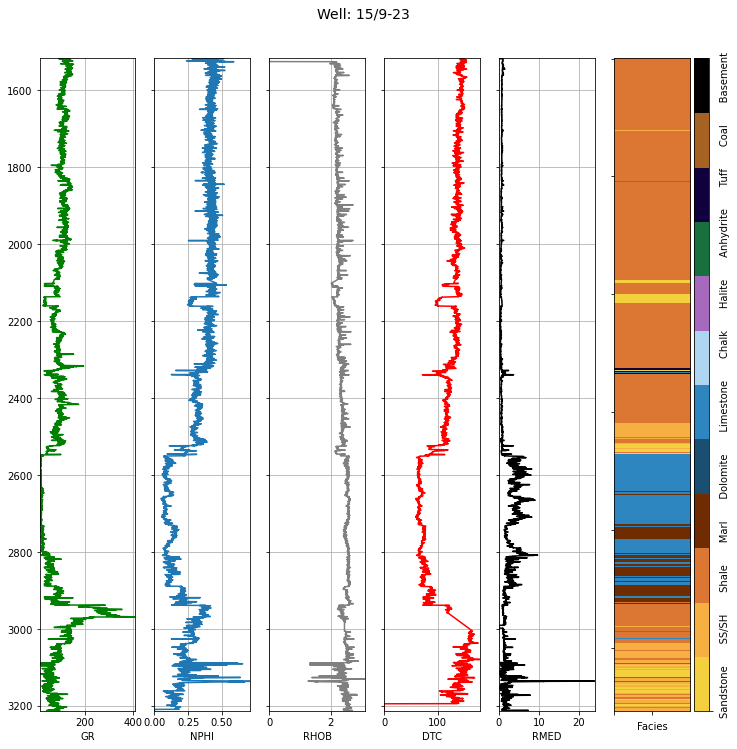

In [14]:
facies.plot_lithofacies(df1, df1.FORCE_2020_LITHOFACIES_LITHOLOGY, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')  # full well

# Predicted well section (Actual)

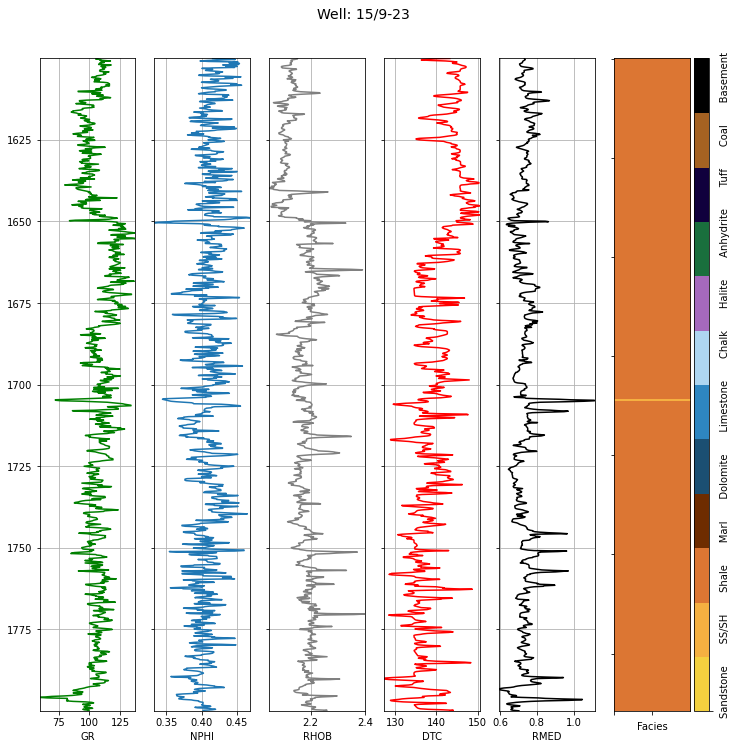

In [15]:
facies.plot_lithofacies(section, labels, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD')  # full well

# Another example

In [16]:
df = pd.read_csv('hidden_test.csv.txt', sep=';')

new_df = df.loc[df['WELL'] == '15/9-23']

handle_df = pds.DataHandlers(df=new_df, target='FORCE_2020_LITHOFACIES_LITHOLOGY')
df1 = handle_df.set_mnemonics()

In [17]:
df1['FORCE_2020_LITHOFACIES_LITHOLOGY'] = df1.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_numbers)

This example uses different well section range to indicate how the accuracy is largely dependent on the data provided

In [18]:
labels = new_df[(new_df['DEPTH_MD'] >= 2900) & (new_df['DEPTH_MD'] < 3200)].FORCE_2020_LITHOFACIES_LITHOLOGY
labels = labels.map(lithology_numbers)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


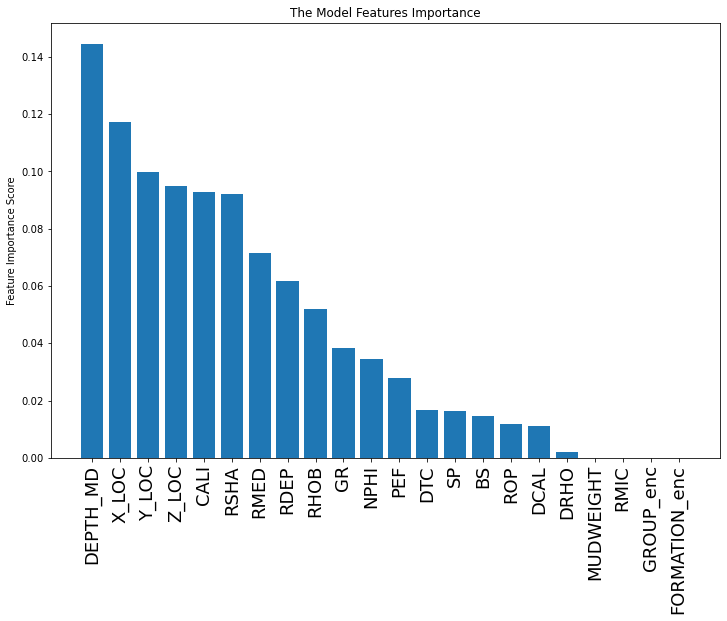

<Figure size 864x576 with 0 Axes>

In [19]:
model1, test_features1 = facies._train(train_df=df1,
                                     start=2900,
                                     end=3200,
                                     target='FORCE_2020_LITHOFACIES_LITHOLOGY',
                                     model='RF')

In [22]:
predictions1 = facies.predict(model=model1, test_df=test_features1)

Predictions complete!


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [23]:
show_evaluation(predictions1, labels)  

Accuracy is: 33.25 %
F1 is: 38.28 %


In [21]:
labels.shape, predictions1.shape

((1973,), (1316,))

In [25]:
section = df1[(df1['DEPTH_MD'] >= 2900) & (df1['DEPTH_MD'] < 3200)]

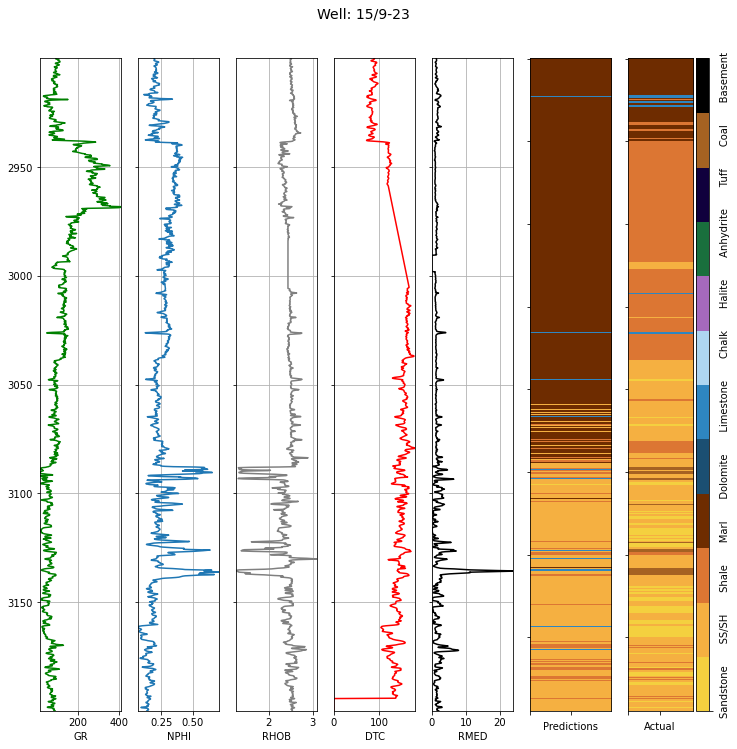

In [26]:
facies.compare_lithofacies(section, labels, predictions1, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='RMED', depth_col='DEPTH_MD') 

As we can see that this accuracy is much lower compard to that of the initial example.

See the official package documentations for more on how to use the codes: https://petroeval.readthedocs.io/

# LICENSE

The well log labels used for this tutorial are licensed CC-BY-4.0. The well log data used for making this notebook tutorial is licensed as Norwegian License for Open Government Data (NLOD) 2.0. Any publication involving the well log data must cite “Lithofacies data was provided by the FORCE Machine Learning competition with well logs and seismic 2020”. For citation please use: Bormann P., Aursand P., Dilib F., Dischington P., Manral S. 2020. 2020 FORCE Machine Learning Contest.